# Kaggle Statistic Synthetic Dataset Analysis

Source Reference: https://www.kaggle.com/competitions/playground-series-s3e17/data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls

drive/  sample_data/


## Data Info and Cleaning

In [2]:
import pandas as pd
from os import path

DATA_DIR_PATH = '../data/'
x_train = pd.read_csv(path.join(DATA_DIR_PATH, 'playground-series-s3e17/train.csv'))
x_test = pd.read_csv(path.join(DATA_DIR_PATH, 'playground-series-s3e17/test.csv'))
x_original = pd.read_csv(path.join(DATA_DIR_PATH, 'playground-series-s3e17/machine_failure.csv'))

id_test = x_test['id']

In [3]:
def clean_column_names(df):
    df.columns = df.columns.str.replace('[', '')
    df.columns = df.columns.str.replace(']', '')
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace(':', '')
    return df

x_train = clean_column_names(x_train)
x_test = clean_column_names(x_test)
x_original = clean_column_names(x_original)

In [4]:
print(f'Shape of the training data: {x_train.shape}')
print(f'Shape of the testing data: {x_test.shape}')
print(f'Shape of the original data: {x_original.shape}')

Shape of the training data: (136429, 14)
Shape of the testing data: (90954, 13)
Shape of the original data: (10000, 14)


In [5]:
x_train.drop(['id'], axis=1, inplace=True)
x_test.drop(['id'], axis=1, inplace=True)
x_original.drop(['UDI'], axis=1, inplace=True)

In [6]:
print(f'{"Training data":-^50}')
print(x_train.info())
print(f'{"Testing data":-^50}')
print(x_test.info())
print(f'{"Original data":-^50}')
print(x_original.info())

------------------Training data-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product_ID             136429 non-null  object 
 1   Type                   136429 non-null  object 
 2   Air_temperature_K      136429 non-null  float64
 3   Process_temperature_K  136429 non-null  float64
 4   Rotational_speed_rpm   136429 non-null  int64  
 5   Torque_Nm              136429 non-null  float64
 6   Tool_wear_min          136429 non-null  int64  
 7   Machine_failure        136429 non-null  int64  
 8   TWF                    136429 non-null  int64  
 9   HDF                    136429 non-null  int64  
 10  PWF                    136429 non-null  int64  
 11  OSF                    136429 non-null  int64  
 12  RNF                    136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
mem

In [7]:
print(f'{"Training data":-^50}')
print(x_train.describe())
print(f'{"Testing data":-^50}')
print(x_test.describe())
print(f'{"Original data":-^50}')
print(x_original.describe())

------------------Training data-------------------
       Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
count      136429.000000          136429.000000         136429.000000   
mean          299.862776             309.941070           1520.331110   
std             1.862247               1.385173            138.736632   
min           295.300000             305.800000           1181.000000   
25%           298.300000             308.700000           1432.000000   
50%           300.000000             310.000000           1493.000000   
75%           301.200000             310.900000           1580.000000   
max           304.400000             313.800000           2886.000000   

           Torque_Nm  Tool_wear_min  Machine_failure            TWF  \
count  136429.000000  136429.000000    136429.000000  136429.000000   
mean       40.348643     104.408901         0.015744       0.001554   
std         8.502229      63.965040         0.124486       0.039389   
min    

In [8]:
x_train.head()

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [9]:
# Simplify Product_ID values
print('Before removing the letter "P" in Product_ID:')
print(len(x_train['Product_ID'].unique()))
# Remove letter in Product_ID and convert to int
x_train['Product_ID'] = x_train['Product_ID'].str[1:].astype(int)
x_test['Product_ID'] = x_test['Product_ID'].str[1:].astype(int)
x_original['Product_ID'] = x_original['Product_ID'].str[1:].astype(int)

print('After removing the letter "P" in Product_ID and converting to int:')
print(len(x_train['Product_ID'].unique()))

Before removing the letter "P" in Product_ID:
9976
After removing the letter "P" in Product_ID and converting to int:
9976


In [10]:
x_ = pd.concat([x_train, x_test], axis=0)
x_train_cat = x_.astype(str)
x_test_cat = x_test.astype(str)

In [11]:
# Making One-Hot encoding for 'Type' column

x_train = pd.concat([x_train, pd.get_dummies(x_train['Type'], prefix='Type').astype(int)], axis=1)
x_train.drop('Type', axis=1, inplace=True)

x_test = pd.concat([x_test, pd.get_dummies(x_test['Type'], prefix='Type').astype(int)], axis=1)
x_test.drop('Type', axis=1, inplace=True)

x_original = pd.concat([x_original, pd.get_dummies(x_original['Type'], prefix='Type').astype(int)], axis=1)
x_original.drop('Type', axis=1, inplace=True)

In [12]:
x_train

,Product_ID,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,22284,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0,0,1
136425,38017,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1,0,0
136426,54690,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,0,1,0
136427,53876,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,0,1,0


## Exploratory Data Analysis

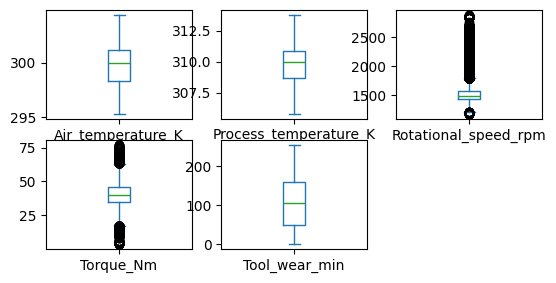

In [13]:
import matplotlib.pyplot as plt

x_train.iloc[:, 1:6].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (16, 14)
plt.show()

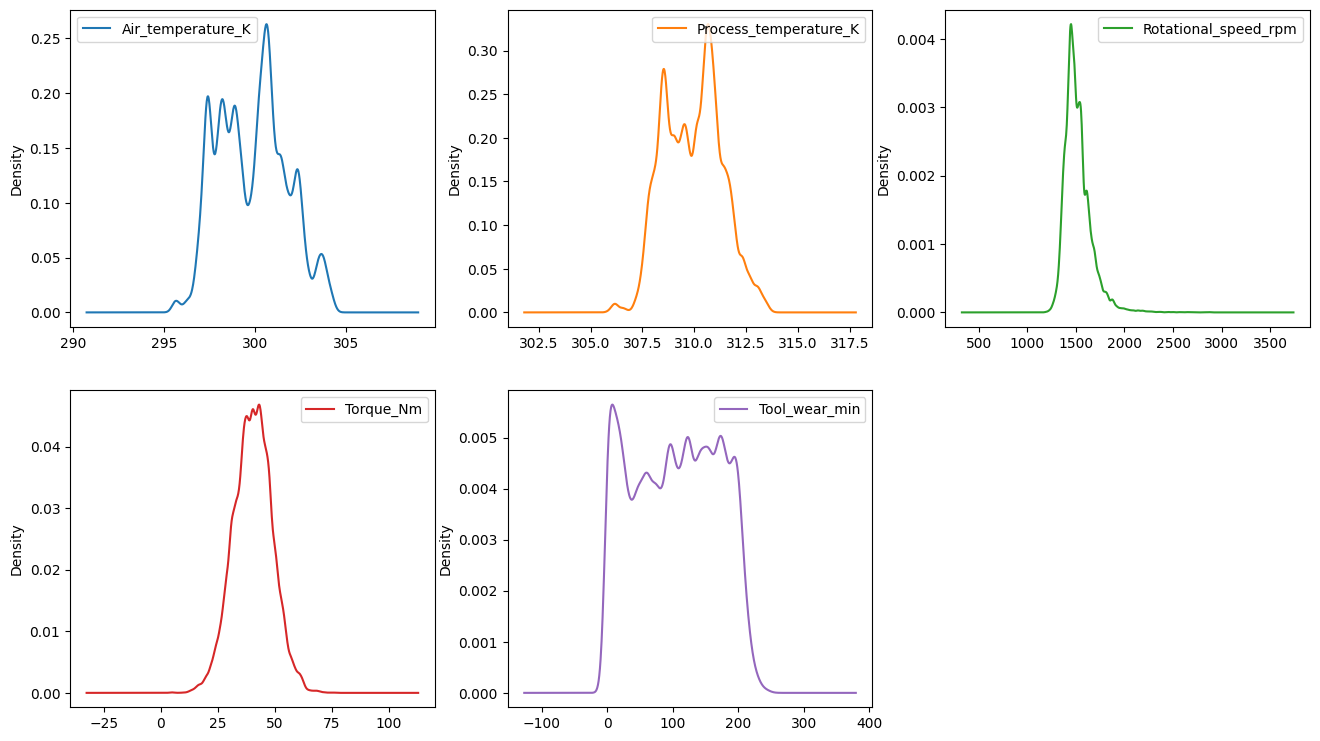

In [14]:
x_train.iloc[:, 1:6].plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (16, 14)
plt.show()

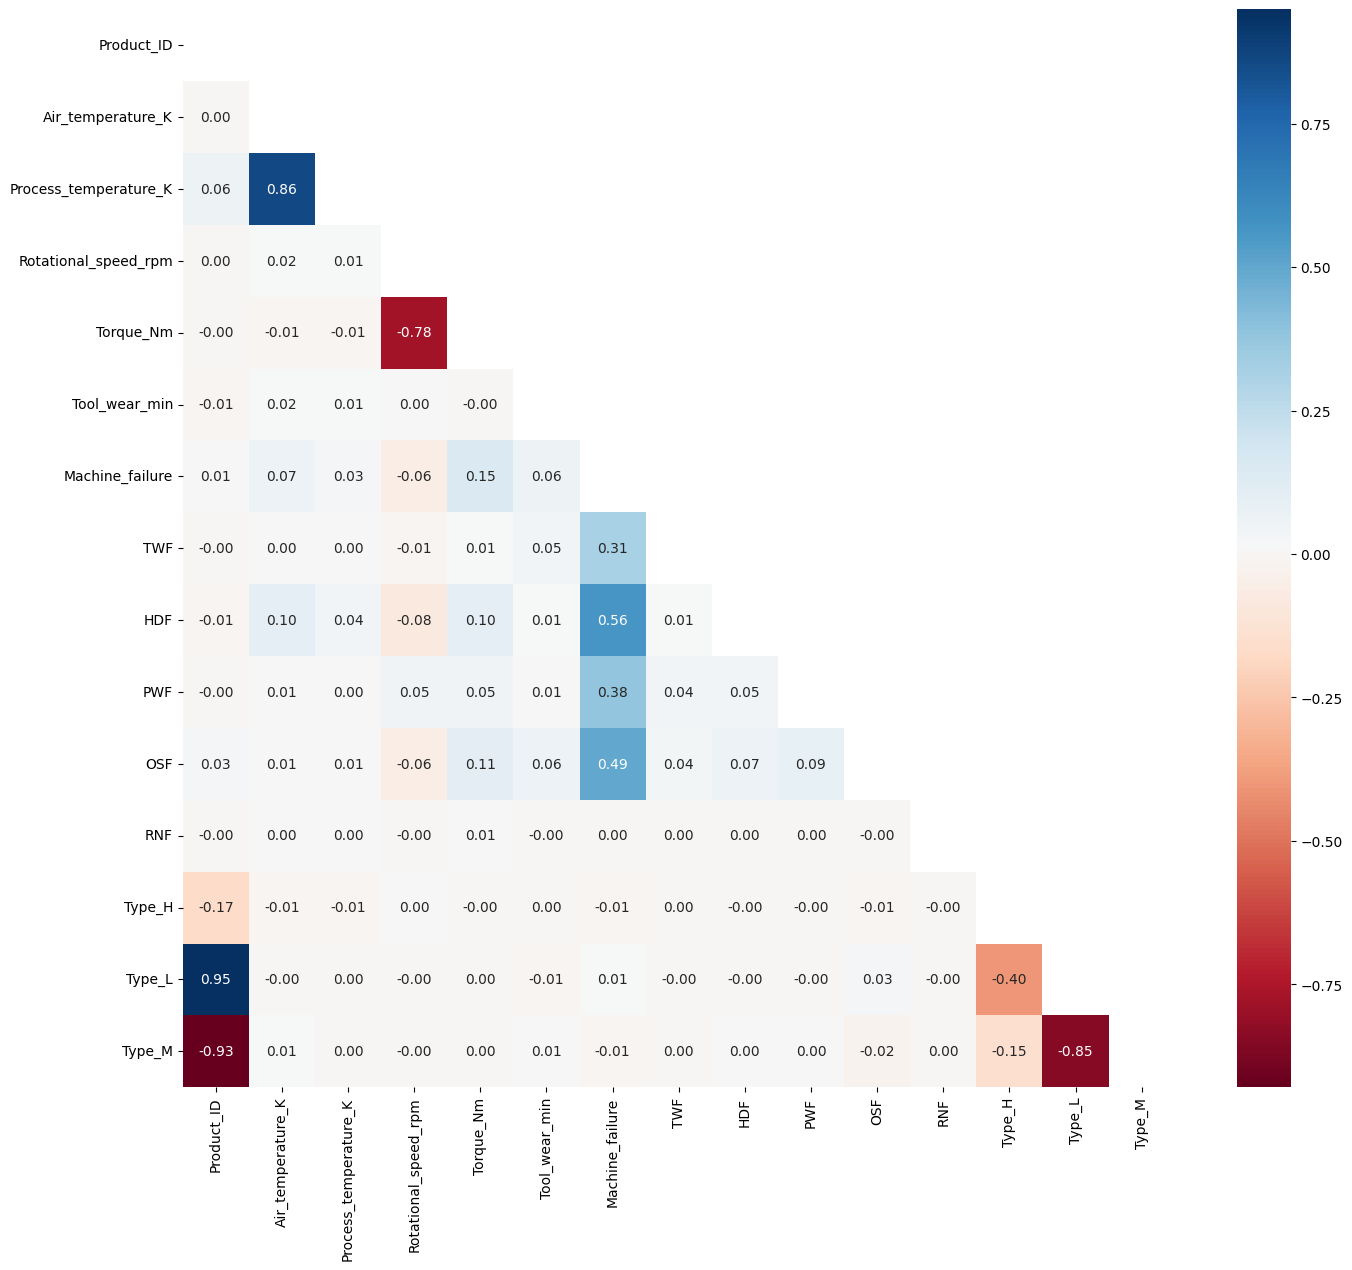

In [15]:
import seaborn as sns
import numpy as np

corr = x_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (10, 10)

We can see from previous correlation matrix that Torque and RPM as expected are highly correlated, although negatively. From the features to failure modes, we can see that from temperature, the Air Temperature is greater correlated with HDF than Process temperature. Maybe when outside air temperture is too hot, is close to failing. We can see that higher torque is related to HDF and OSF, and therefore, RPM is negatively correlated with same failure modes. Finally, Tool wear is correlated with OSF and TWF.
In summary:
* Rotational_speed_rpm ~ -Torque_Nm
* Air_temperature_K ~ HDF
* Torque_Nm ~ HDF
* Torque_Nm ~ OSF
* Tool_wear_min ~ OSF
* Tool_wear_min ~ TWF

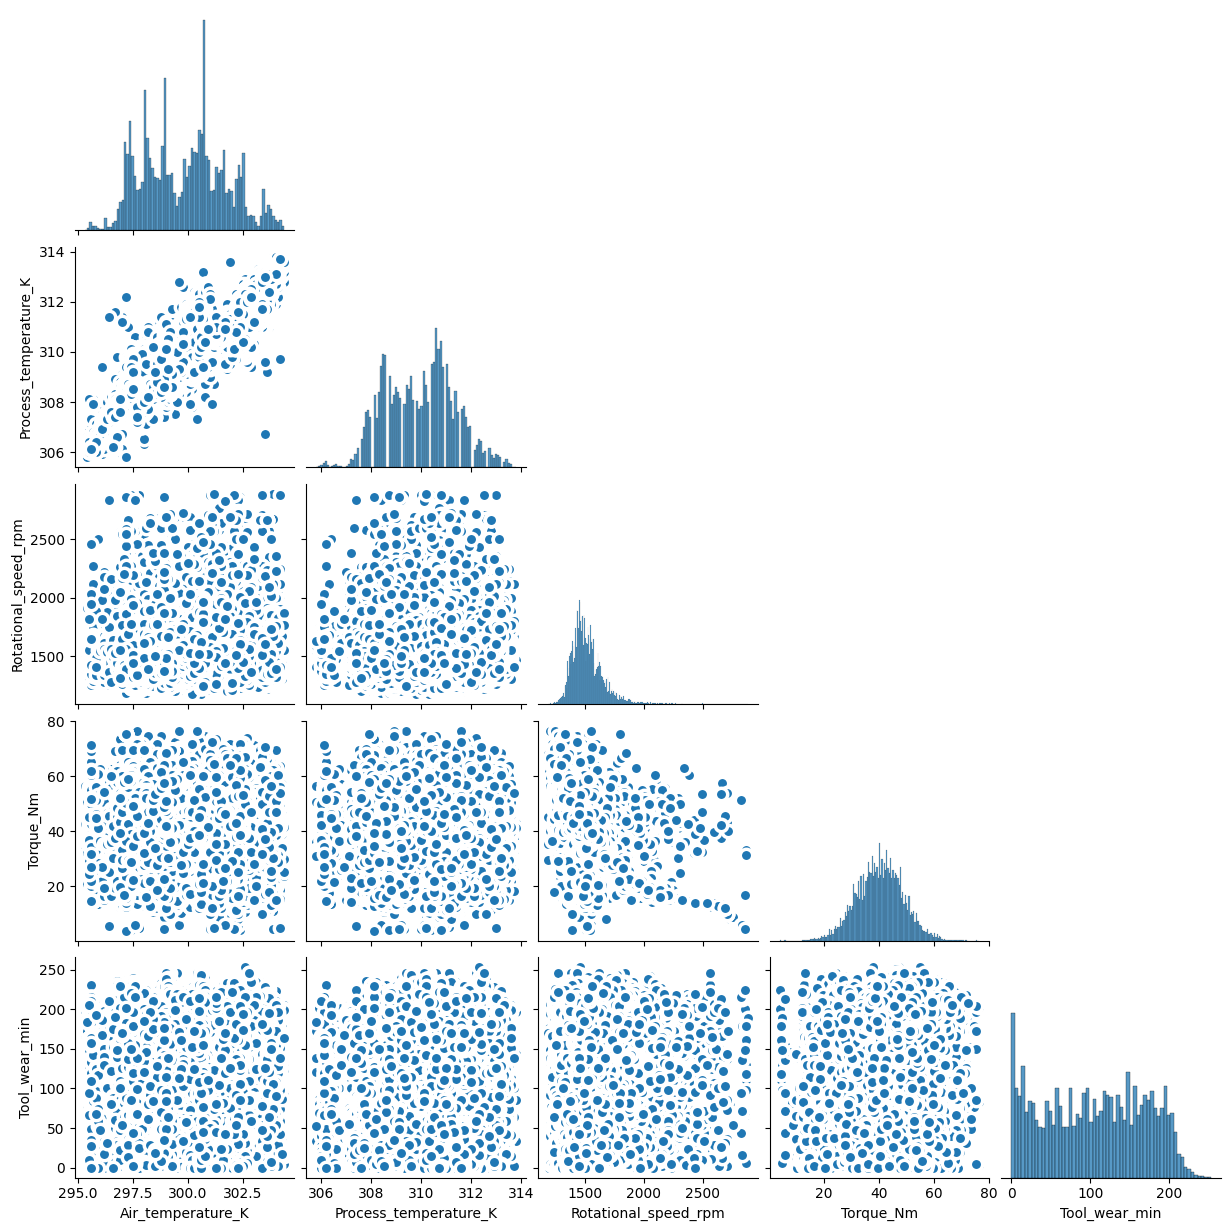

In [16]:
sns.pairplot(data=x_train.iloc[:, 1:6], corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5})
plt.show()

In [17]:
x_train.isnull().sum()

Product_ID               0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
Type_H                   0
Type_L                   0
Type_M                   0
dtype: int64

In [18]:
x_train.isna().sum()

Product_ID               0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
Type_H                   0
Type_L                   0
Type_M                   0
dtype: int64

In [19]:
x_train.duplicated().sum()

1134

In [20]:
x_train.nunique().sort_values()

Machine_failure             2
TWF                         2
HDF                         2
PWF                         2
OSF                         2
RNF                         2
Type_H                      2
Type_L                      2
Type_M                      2
Process_temperature_K      81
Air_temperature_K          95
Tool_wear_min             246
Torque_Nm                 611
Rotational_speed_rpm      952
Product_ID               9976
dtype: int64

In [21]:
print('Shape of the training data: ', x_train.shape)
print('Shape of the original data: ', x_original.shape)

Shape of the training data:  (136429, 15)
Shape of the original data:  (10000, 15)


In [22]:
x_total = pd.concat([x_train, x_original], axis=0)
x_total.shape

(146429, 15)

In [23]:
# Create Feature Engineering DataFrame copies to keep the original data
x_train_fe = x_train.copy()
x_test_fe = x_test.copy()
x_total_fe = x_total.copy()

In [24]:
import numpy as np

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    # RelationTemperature should be less than 1 and closer to 1 as air temp increases and close to failure
    df['RelationTemperature'] = df['Air_temperature_K'] / df['Process_temperature_K']
    df['TorqueRPM'] = df['Torque_Nm'] / df['Rotational_speed_rpm']
    df['WearRPM'] = df['Tool_wear_min'] / df['Rotational_speed_rpm']
    df['ToolWearTorque'] = df['Tool_wear_min'] / df['Torque_Nm']

    for col in ['Torque_Nm', 'Tool_wear_min', 'Rotational_speed_rpm']:
        df[f'{col}_B'] = pd.cut(df[col], bins=20)
        df[f'{col}_B'] = df[f'{col}_B'].cat.codes + 1

    df['TotalF'] = df['TWF'] + df['HDF'] + df['PWF'] + df['OSF']

    angular_velocity = df['Rotational_speed_rpm'] * 2 * np.pi / 60

    df['Power_W'] = df['Torque_Nm'] * angular_velocity
    df['Energy_J'] = df['Power_W'] * df['Tool_wear_min'] * 60

    return df

x_train_fe = feature_engineering(x_train_fe)
x_test_fe = feature_engineering(x_test_fe)
x_total_fe = feature_engineering(x_total_fe)


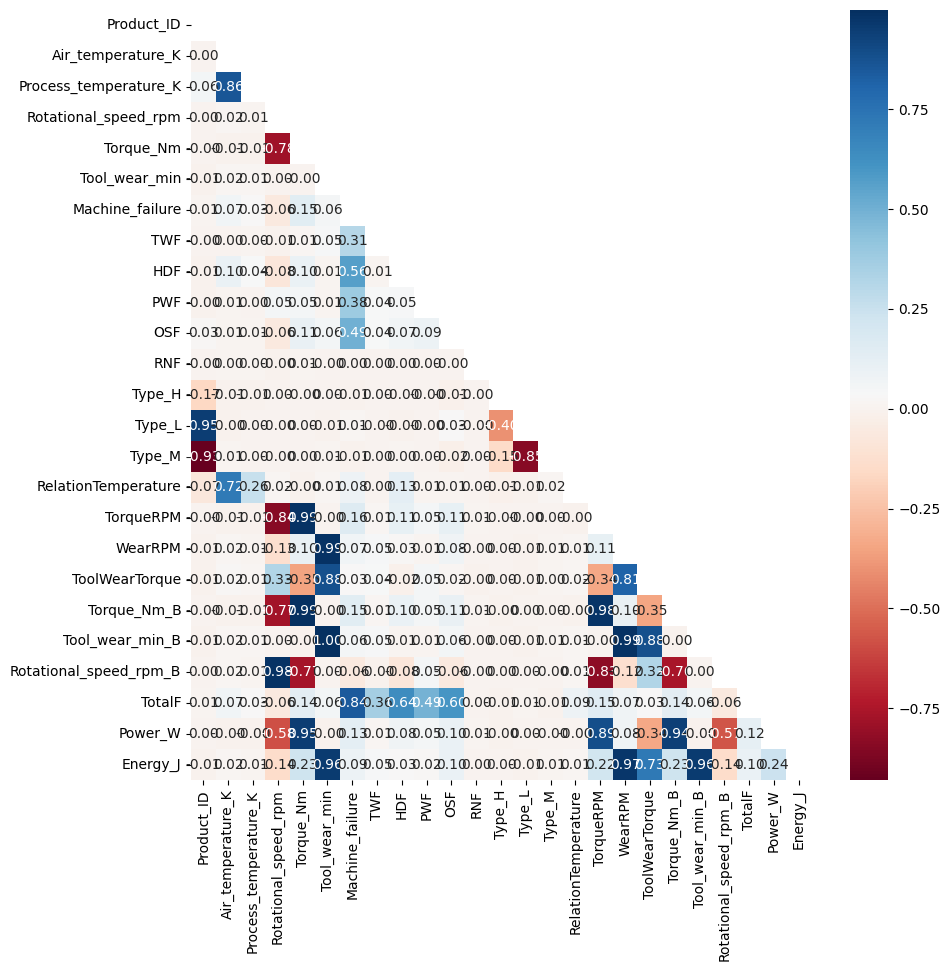

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = x_train_fe.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (45, 30)
plt.show()

In [26]:
# REFECV - Recursive Feature Elimination with Cross-Validation
columns_to_drop = ['Type_H', 'Type_L', 'Type_M']
x_train_fr_rfecv = x_train_fe.drop(columns_to_drop, axis=1)
x_test_fr_rfecv = x_test_fe.drop(columns_to_drop, axis=1)

In [27]:
# Table of Shapes of X_train ,X_train_FE, X_total_FE, X_total, X_train_FR_RFECV and X_train_cat
print('Shape of the training data: ', x_train.shape)
print('Shape of the training data with FE: ', x_train_fe.shape)
print('Shape of the training data with FE and OHE: ', x_train_fr_rfecv.shape)
print('Shape of the original data with trainning data and FE: ', x_total_fe.shape)
print('Shape of the original data with trainning data: ', x_total.shape)
print('Shape of the training data CAT: ', x_train_cat.shape)

Shape of the training data:  (136429, 15)
Shape of the training data with FE:  (136429, 25)
Shape of the training data with FE and OHE:  (136429, 22)
Shape of the original data with trainning data and FE:  (146429, 25)
Shape of the original data with trainning data:  (146429, 15)
Shape of the training data CAT:  (227383, 13)


In [28]:
# Submission to a file
import os
OUT_DATA_DIR_PATH = '../data/kaggle_s2/'
if not path.exists(OUT_DATA_DIR_PATH):
    print('Creating directory:', OUT_DATA_DIR_PATH)
    os.makedirs(OUT_DATA_DIR_PATH)

## Training data

x_train.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_train.csv'), index=False)
x_train_fe.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_train_FE.csv'), index=False)
## Test data
x_test.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_test.csv'), index=False)
x_test_fe.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_test_FE.csv'), index=False)
## Original data concatenated with the training data
x_total.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_total.csv'), index=False)
x_total_fe.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_total_FE.csv'), index=False)

# Training data with Feature reduction
## RFECV - Recursive Feature Elimination with Cross-Validation
x_train_fr_rfecv.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_train_FR_RFECV.csv'), index=False)
x_test_fr_rfecv.to_csv(path.join(OUT_DATA_DIR_PATH, 'X_test_FR_RFECV.csv'), index=False)

## MODEL TRAINING AND RESUTLS

In [66]:
import pandas as pd

def dataset(FE, FR, OR, CAT):
    if CAT == 0:
        if OR == 0:
            if FR == 0:
                if FE == 0:
                    X_train = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_train.csv')
                    X_test = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_test.csv') # Test data
                else:
                    X_train = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_train_FE.csv')
                    X_test = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_test_FE.csv') # Test data
            else:
                X_train = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_train_FR_RFECV.csv')
                X_test = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_test_FR_RFECV.csv') # Test data
        else:
            if FE == 0:
                X_train = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_total.csv')
                X_test = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_test.csv') # Test data
            else:
                X_train = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_total_FE.csv')
                X_test = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_test_FE.csv')
    else:
        X_train = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_train_CAT.csv')
        X_test = pd.read_csv(f'{OUT_DATA_DIR_PATH}X_test_CAT.csv') # Test data
    
    return X_train, X_test

In [30]:

from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

def roc_auc(model, x_train, y_train, n_splits=5, n_repeats=3):

    folds = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    oof_preds = np.zeros(x_train.shape[0])

    for train_index, valid_index in folds.split(x_train, y_train):
        x_train_fold, x_valid_fold = x_train.iloc[train_index], x_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        model.fit(x_train_fold, y_train_fold)

        oof_preds[valid_index] = model.predict_proba(x_valid_fold)[:, 1]
    
    auc = roc_auc_score(y_train, oof_preds)
    return auc

In [41]:
Best_LGBM = {
    'colsample_bytree': 0.1923023355270077,
    'learning_rate': 0.03574583615481279,
    'max_depth': 16, 
    'min_child_samples': 89, 
    'n_estimators': 260, 
    'num_leaves': 68, 
    'reg_alpha': 0.30028296727692755, 
    'reg_lambda': 0.6125642241926401, 
    'subsample': 0.7293703101825368
}

Best_XGB =  {
    'max_depth': 13, 
    'learning_rate': 0.012308520402322306, 
    'colsample_bytree': 0.15564433647290904, 
    'subsample': 0.9392376085401448, 
    'n_estimators': 494, 
    'min_child_weight': 1, 
    'reg_alpha': 0.26760253520809857, 
    'reg_lambda': 0.24616802866656362
}

Best_Cat_Opt_AllCat = {
    'iterations': 249, 
    'depth': 6, 
    'learning_rate': 0.1555748471212781, 
    'random_strength': 58, 
    'bagging_temperature': 87.47376677399185, 
    'od_type': 'IncToDec', 
    'od_wait': 27
}

Best = {
    'colsample_bytree': 0.19297355677628159, 
    'learning_rate': 0.020755882048032786, 
    'max_depth': 9, 
    'min_child_samples': 41, 
    'n_estimators': 320, 
    'num_leaves': 100, 
    'reg_alpha': 0.39149507035237485, 
    'reg_lambda': 0.43245778149146746, 
    'subsample': 0.518843726404794,
    'verbose': -1
}

In [62]:
Train_sets = {
    'Normal dataset': [0, 0, 0, 0],
    'Dataset With FE': [1, 0, 0, 0],
    'Dataset With FE and FR': [1, 1, 0, 0],
    'Dataset Ori + train no FE': [0, 0, 1, 0],
    'Dataset Ori + train with FE': [1, 0, 1, 0]
}


Model:  Normal dataset    AUC:  0.9375522915709001
Model:  Dataset With FE    AUC:  0.9674906256713371


In [51]:
X_train, X_test  = dataset(0, 0, 1, 0)
y_train = X_train['Machine_failure']
X_train = X_train.drop(['Machine_failure'], axis=1)
X_train = X_train.drop('Product_ID', axis=1)
X_train = X_train.drop('TWF', axis=1)
X_train = X_train.drop('HDF', axis=1)
X_train = X_train.drop('PWF', axis=1)
X_train = X_train.drop('OSF', axis=1)
X_train = X_train.drop('RNF', axis=1)
X_train

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Type_H,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,1
2,299.3,308.5,1805,26.5,25,0,1,0
3,301.0,310.9,1524,44.3,197,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,1
...,...,...,...,...,...,...,...,...
146424,298.8,308.4,1604,29.5,14,0,0,1
146425,298.9,308.4,1632,31.8,17,1,0,0
146426,299.0,308.6,1645,33.4,22,0,0,1
146427,299.0,308.7,1408,48.5,25,1,0,0


In [52]:
# Libraries
import lightgbm as lgb
# hp 
from hyperopt import hp, tpe, STATUS_OK, Trials, fmin
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold

space ={
    'max_depth': hp.quniform('max_depth', 6, 18, 1),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.4, 1.0),
    'n_estimators': hp.quniform('n_estimators', 100, 400, 10),
    'min_child_samples': hp.quniform('min_child_samples', 20, 100, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0.15, 0.5),
    'reg_lambda': hp.uniform('reg_lambda', 0.3, 1.0)
}

def objective(space):
    model_LGBM = lgb.LGBMClassifier(max_depth = int(space['max_depth']),
                             learning_rate = space['learning_rate'],
                             num_leaves = int(space['num_leaves']),
                             n_estimators = int(space['n_estimators']),
                             colsample_bytree = space['colsample_bytree'],
                             subsample = space['subsample'],
                             is_unbalance = True,
                             min_child_samples = int(space['min_child_samples']),
                             reg_alpha = space['reg_alpha'],
                             reg_lambda = space['reg_lambda'],
                             verbose = -1)
    
    cv = StratifiedKFold(n_splits=10)
    y_pred_proba = cross_val_predict(model_LGBM, X_train, y_train, cv=cv, method='predict_proba')[:,1]
    auc = roc_auc_score(y_train, y_pred_proba)
    return {'loss': -auc, 'status': STATUS_OK}

# Run the algorithm
trials = Trials()
best_LGBM = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best_LGBM)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [10:21<00:00, 12.43s/trial, best loss: -0.9446718677071586]
Best:  {'colsample_bytree': 0.26793389078609825, 'learning_rate': 0.059422999420725986, 'max_depth': 8.0, 'min_child_samples': 21.0, 'n_estimators': 290.0, 'num_leaves': 21.0, 'reg_alpha': 0.15015502048065552, 'reg_lambda': 0.3847297855069447, 'subsample': 0.5187053422238705}


In [55]:
print(best_LGBM)

{'colsample_bytree': 0.26793389078609825, 'learning_rate': 0.059422999420725986, 'max_depth': 8.0, 'min_child_samples': 21.0, 'n_estimators': 290.0, 'num_leaves': 21.0, 'reg_alpha': 0.15015502048065552, 'reg_lambda': 0.3847297855069447, 'subsample': 0.5187053422238705}


In [65]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import lightgbm as lgb

scores = {}

best_LGBM['max_depth'] = int(best_LGBM['max_depth'])
best_LGBM['num_leaves'] = int(best_LGBM['num_leaves'])
best_LGBM['n_estimators'] = int(best_LGBM['n_estimators'])
best_LGBM['min_child_samples'] = int(best_LGBM['min_child_samples'])
best_LGBM['verbose'] = -1

for name, df_model in Train_sets.items():
    print(f'Training model: {name}...')
    X_train, X_test = dataset(df_model[0], df_model[1], df_model[2], df_model[3])
    y_train = X_train['Machine_failure']
    X_train = X_train.drop('Machine_failure', axis=1)
    X_train = X_train.drop('TWF', axis=1)
    X_train = X_train.drop('HDF', axis=1)
    X_train = X_train.drop('PWF', axis=1)
    X_train = X_train.drop('OSF', axis=1)
    X_train = X_train.drop('RNF', axis=1)
    
    # Initialize the Repeated Stratified K Fold
    rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    # Create an empty list to store the Out-of-Fold (OOF) predictions
    oof_preds = np.zeros(X_train.shape[0])
    # Loop through each split
    for train_index, valid_index in rskf.split(X_train, y_train):
        
        # Split the data
        X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]
        
        # Fit the model
        model_lgbm = lgb.LGBMClassifier(**best_LGBM)
        model_lgbm.fit(X_train_fold, y_train_fold)
        
        # Make predictions and add them to the OOF predictions
        oof_preds[valid_index] = model_lgbm.predict_proba(X_valid_fold)[:,1]

    # Calculate the overall AUC
    auc = roc_auc_score(y_train, oof_preds)

    print("Model: ", name, "   AUC: ", auc)

Training model: Normal dataset...
Model:  Normal dataset    AUC:  0.9383801661811579
Training model: Dataset With FE...
Model:  Dataset With FE    AUC:  0.9647437628258271
Training model: Dataset With FE and FR...


FileNotFoundError: [Errno 2] No such file or directory: '../data/kaggle_s2/X_test_FR_RFEC.csv'